In [17]:
import pickle
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import random
from doctr.models import ocr_predictor
from doctr.io import DocumentFile

In [18]:
def load_text_detection_model(model_weight_path=None):
    model = ocr_predictor(det_arch='db_resnet50', pretrained=True)
    if not model_weight_path is None:
        model.det_predictor.model.load_weights(model_weight_path)
    return model

default_model = load_text_detection_model()
cut_fine_tuning_model = load_text_detection_model("cut_fine_tuning/weights")
fine_tuning_model = load_text_detection_model("fine_tuning_final/weights")

In [19]:
def load_image(filepath, resize=None):
    im = tf.io.read_file(filepath)
    im = tf.image.decode_png(im, channels=0)
    if resize:
        return tf.image.resize(im, resize)
    return im

In [20]:
filepath = '../../streamlit_app/tmp/canvas_file_test2.png'
doc = DocumentFile.from_images(filepath)
img_arr = load_image(filepath)

res_default_model = default_model(doc)
res_cut_fine_tuning_model = cut_fine_tuning_model(doc)
res_fine_tuning_model = fine_tuning_model(doc)

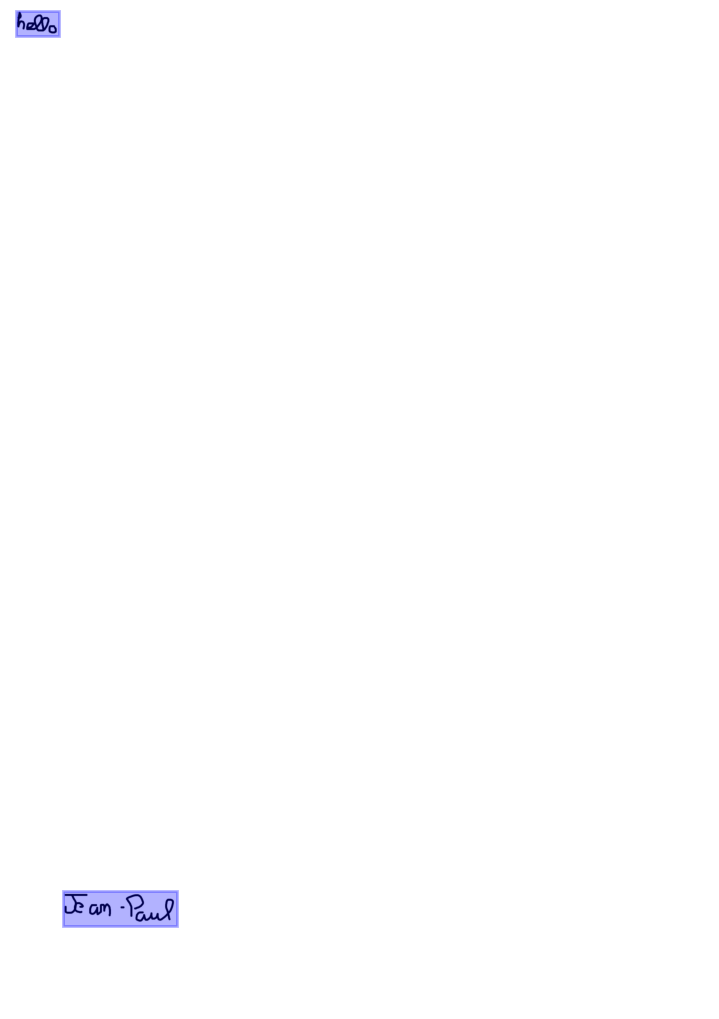

In [21]:
res_default_model.show(doc)

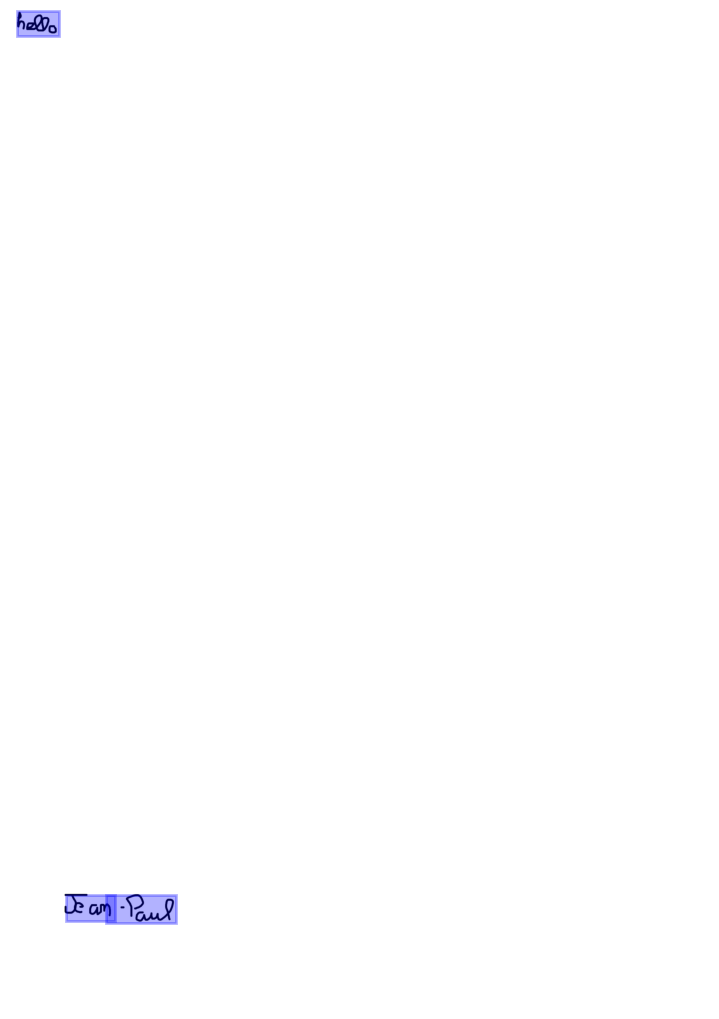

In [22]:
res_cut_fine_tuning_model.show(doc)

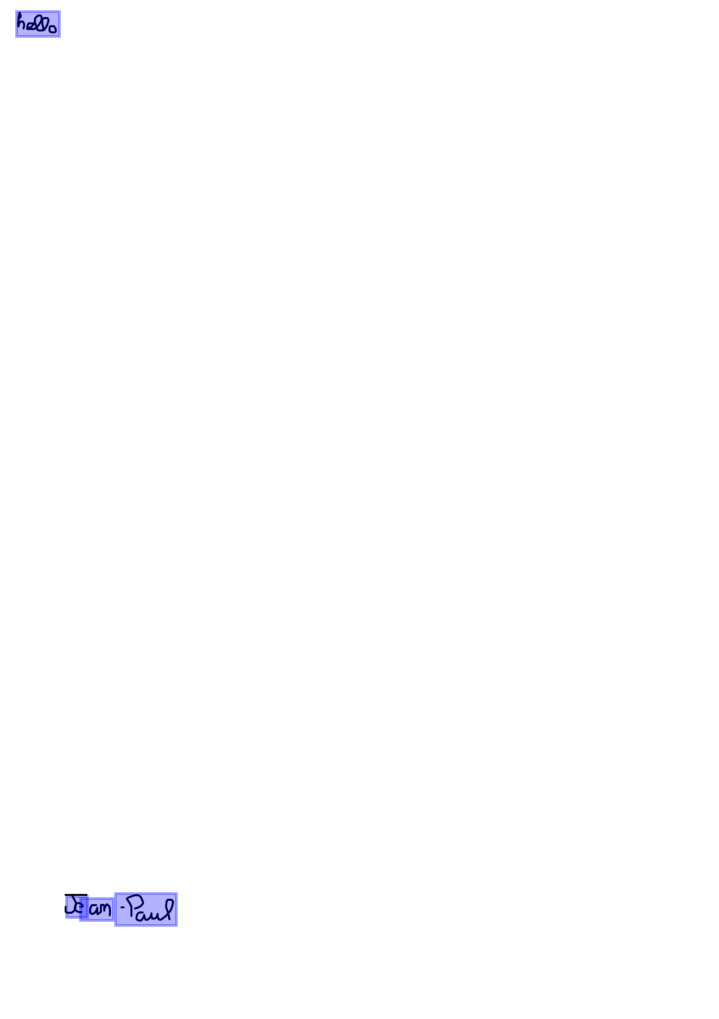

In [23]:
res_fine_tuning_model.show(doc)

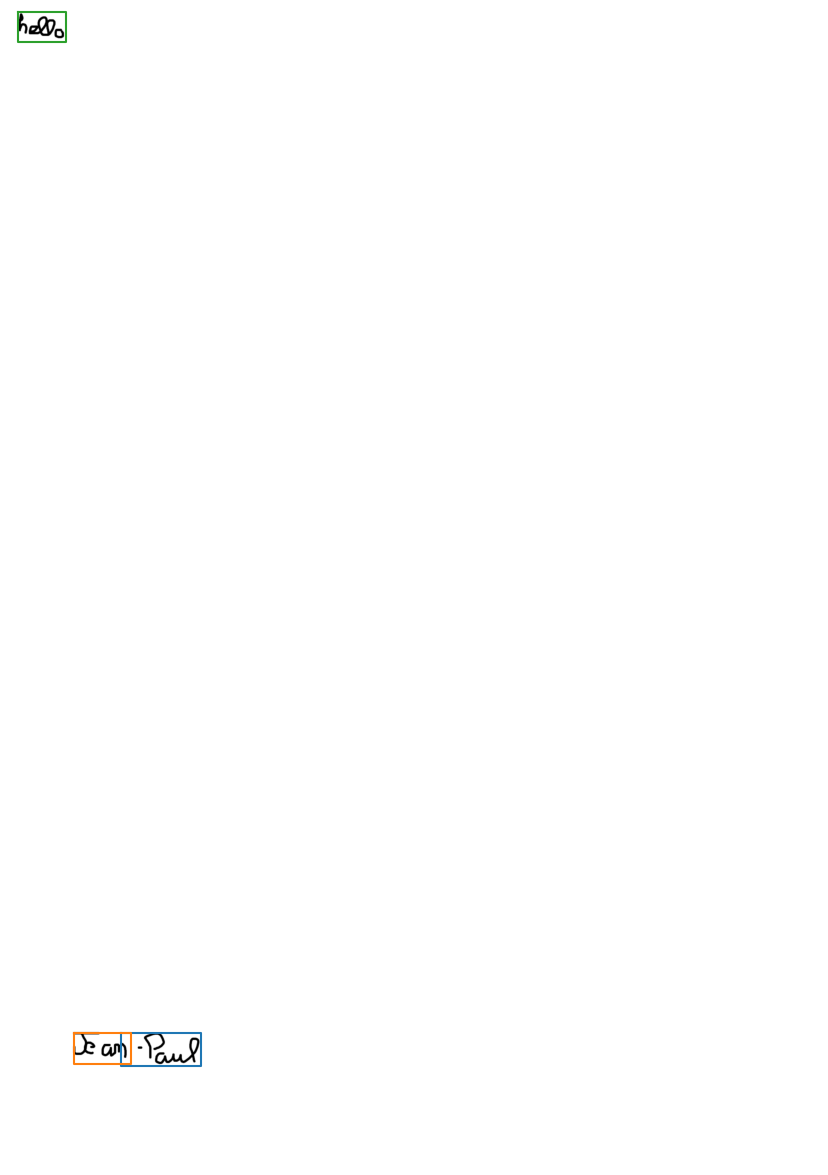

In [28]:
def plot_img_with_bboxes(img_arr, bounding_boxes_xyhw, figsize = (20, 15)):
    fig = plt.figure(figsize=figsize)
    plt.imshow(img_arr, cmap='gray')
    plt.axis('off')
    i = 0 
    for i, bounding_box in enumerate(bounding_boxes_xyhw):
        x = bounding_box[0]
        y = bounding_box[1]
        h = bounding_box[2]
        w = bounding_box[3]
        plt.plot([x, x+w, x+w, x, x], [y, y, y+h, y+h, y])
    plt.show()

def format_bounding_boxes_xyhw(bounding_boxes, size = (1, 1)):
    return [[bbox[0] * size[1], bbox[1] * size[0], (bbox[3] - bbox[1]) * size[0], (bbox[2] - bbox[0]) * size[1]] for bbox in bounding_boxes ]


def show_bbox_from_file(det_model, filepath, resize = None):
    doc = DocumentFile.from_images(filepath)
    img_arr = load_image(filepath, resize=resize)
    if not resize is None:
        img_arr /= 255
    res = det_model(doc)
    doctr_bboxes = det_model.det_predictor(doc)[0]
    bounding_boxes_xyhw = format_bounding_boxes_xyhw(doctr_bboxes, (img_arr.shape[0], img_arr.shape[1]))
    plot_img_with_bboxes(img_arr, bounding_boxes_xyhw)
    return doc, res

doc, result = show_bbox_from_file(cut_fine_tuning_model, filepath)


In [ ]:
det_model = load_text_detection_model()

filepath = '../../streamlit_app/tmp/canvas_file_test2.png'

doc = DocumentFile.from_images(filepath)
img_arr = load_image(filepath)
res = det_model(doc)
doctr_bboxes = det_model.det_predictor(doc)[0]

In [ ]:
type(det_model)